In [ ]:
import sys
sys.path.append('/home/marcelohaps/NVFlare-ResIA/custom/utils')

from data_loader import (
    create_all_partitions,
    load_client_partition,
    load_test_data,
    load_tabular_dataset,
    DATASET_CONFIG
)
import torch
import numpy as np
import matplotlib.pyplot as plt


In [1]:
import torch
import numpy as np
import os

from tabular_data_loader import *

In [3]:
DATASET = 'rcv1'
NUM_CLIENTS = 10
ALPHA = 0.5
SKEW_TYPE = 'quantity'

partition_dir = create_all_partitions(
    dataset_name=DATASET,
    num_clients=NUM_CLIENTS,
    alpha=ALPHA,
    seed=42,
    skew_type=SKEW_TYPE
)


  Shapes: X_train=(15182, 47236), X_test=(5060, 47236)

🎲 Criando partição com quantity skew (α=0.5)...
  Distribuindo 15182 amostras em 10 clientes
  Alpha: 0.5, Mínimo por cliente: 100

💾 Salvando partições...
  Processando Cliente 0... 

NameError: name 'partition_dir' is not defined

## 2. Carregar dados de um cliente


In [4]:
# Carregar dados do cliente 0
client_loader = load_client_partition(
    dataset_name=DATASET,
    client_id=0,
    num_clients=NUM_CLIENTS,
    alpha=ALPHA,
    batch_size=32
)

print(f"DataLoader criado: {len(client_loader)} batches")
print(f"Total de amostras: {len(client_loader.dataset)}")


DataLoader criado: 435 batches
Total de amostras: 13910


## 3. Visualizar distribuição de classes


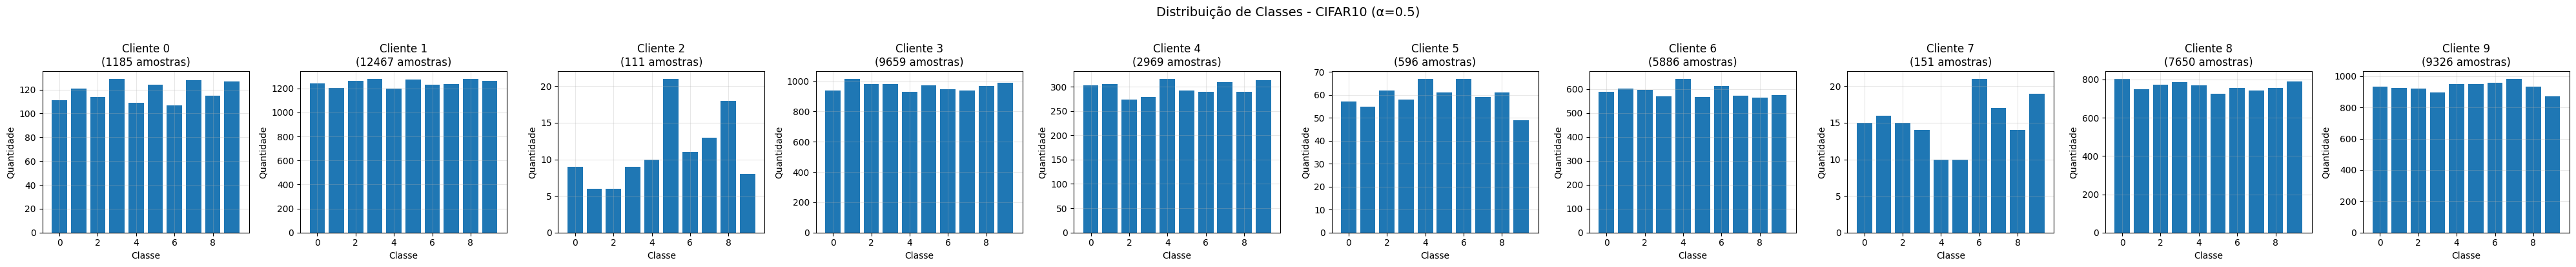

In [14]:
import os

# Carregar metadados
metadata_file = os.path.join("/home/marcelohaps/NVFlare-ResIA/custom/data/splits_partitioned/cifar10_quantity_n10_a0.5_s42", "metadata.pt")
metadata = torch.load(metadata_file)

# Criar gráfico de distribuição
fig, axes = plt.subplots(1, NUM_CLIENTS, figsize=(4*NUM_CLIENTS, 4))

if NUM_CLIENTS == 1:
    axes = [axes]

for client_id in range(NUM_CLIENTS):
    stats = metadata['client_stats'][client_id]
    class_dist = stats['class_distribution']
    
    classes = list(class_dist.keys())
    counts = list(class_dist.values())
    
    axes[client_id].bar(classes, counts)
    axes[client_id].set_title(f"Cliente {client_id}\n({stats['num_samples']} amostras)")
    axes[client_id].set_xlabel('Classe')
    axes[client_id].set_ylabel('Quantidade')
    axes[client_id].grid(True, alpha=0.3)

plt.suptitle(f'Distribuição de Classes - {DATASET.upper()} (α={ALPHA})', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
